Part 1: Implementing Linear Regression in 2 ways!

The first cells below were given in the instructions. 

For the Linear Regression class, I know that we needed two fit function, fit_gradient and fit_analytic. We also need a prediction function and a score function. The class also has an instance of weights. For my gradient descent implementation of linear regression (fit_gradient), I first pad X_train. Then I initialize the weights. Then, I run a loop that performs num_iterations of gradient descent updates. This learns the optimal weights that minimize the square error loss. For my analytic implementation of Linear Regression (fit_analytic), I first pad X_train like I did in gradient descent. Differently, I initialize the weights using the equation. Everything else is the same. 

Furthermore, I have a function (pred) that computes a predicted output y_pred. It is padded X dot weights. Lastly, I have a score function (coefficient determination). The score is calculated as 1 - (the residual sum of squares/the total sum of squares).

In [14]:
import numpy as np
from matplotlib import pyplot as plt

def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

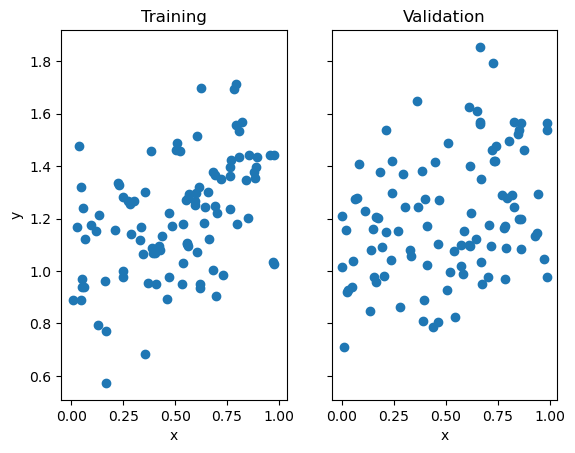

In [15]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")

In [16]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=5000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.r2_scores_train = []  # List to store training scores
        self.r2_scores_val = []  # List to store validation scores
    
    def pad(self, X):
        return np.append(X, np.ones((X.shape[0], 1)), axis=1)
    
    def fit_gradient(self, X_train, y_train):
        X_padded = self.pad(X_train)
        n_samples, n_features = X_padded.shape
        self.weights = np.zeros(n_features)
        
        for _ in range(self.num_iterations):
            gradients = (2 / n_samples) * X_padded.T.dot(X_padded.dot(self.weights) - y_train)
            self.weights -= self.learning_rate * gradients
            
            # Calculate scores and store them
            y_train_pred = X_padded.dot(self.weights)
            r2_train = self.coeff_determination(y_train, y_train_pred)
            self.r2_scores_train.append(r2_train)
            
            y_val_pred = self.predict(X_val)
            r2_val = self.coeff_determination(y_val, y_val_pred)
            self.r2_scores_val.append(r2_val)
    
    def fit_analytic(self, X_train, y_train):
        X_padded = self.pad(X_train)
        self.weights = np.linalg.inv(X_padded.T @ X_padded) @ X_padded.T @ y_train
        
        # Calculate scores and store them
        y_train_pred = X_padded.dot(self.weights)
        r2_train = self.coeff_determination(y_train, y_train_pred)
        self.r2_scores_train.append(r2_train)
        
        y_val_pred = self.predict(X_val)
        r2_val = self.coeff_determination(y_val, y_val_pred)
        self.r2_scores_val.append(r2_val)
        
    def predict(self, X):
        X_padded = self.pad(X)
        y_pred = X_padded.dot(self.weights)
        return y_pred
    
    def coeff_determination(self, y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        coeff_determination = 1 - (ss_residual / ss_total)
        return coeff_determination

    def w(self):
        return self.weights


When I train my data with the gradient fit, I can see that training score is 74% and the validation score is 65%. This is not terrible.

We can further look at the scores over time. We can see that the at one iteration pretty early on, the algorithm is able to arrive at "the best" score.  

We can also print out the weights, as denoted by model.w().

Training Score: 0.7396452171477115
Validation Score: 0.6509874662490212


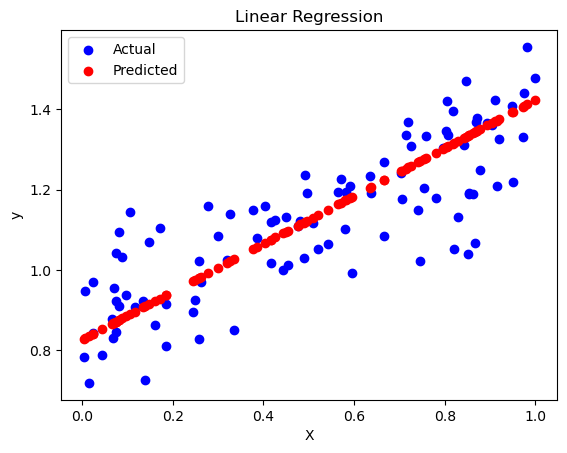

In [27]:
# Generate the data
X_train, y_train, X_val, y_val = LR_data()

# Create an instance of LinearRegression
model = LinearRegression(learning_rate=0.1, num_iterations=1000)

# Train the linear regression model
model.fit_gradient(X_train, y_train)

# Make predictions on the training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate the score for training and validation data
r2_train = model.coeff_determination(y_train, y_train_pred)
r2_val = model.coeff_determination(y_val, y_val_pred)

print("Training Score:", r2_train)
print("Validation Score:", r2_val)

# Visualize the results
plt.scatter(X_val, y_val, color='b', label='Actual')
plt.scatter(X_val, y_val_pred, color='r', label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

In [29]:
model.w()

array([0.59643518, 0.82674881])

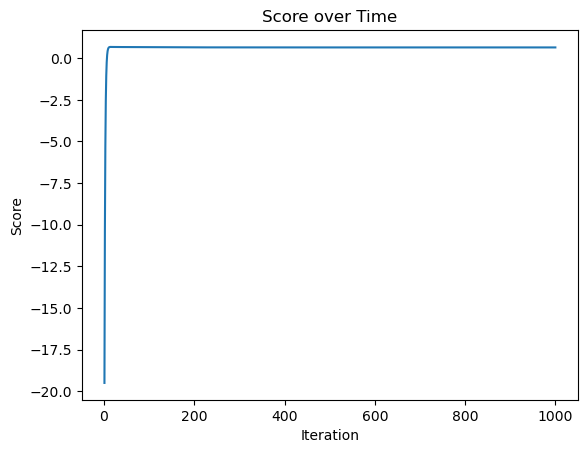

In [28]:
# Plot the scores over time
plt.plot(range(1, len(model.r2_scores_val) + 1), model.r2_scores_val)
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Score over Time')
plt.show()

We can run the same data but with our analytic fit function. When we do this, we see that we will get a training score of 80.0% and a validation score of 79.9%. This is a very solid score!

Training Score: 0.8002254869378185
Validation Score: 0.7993011810100353


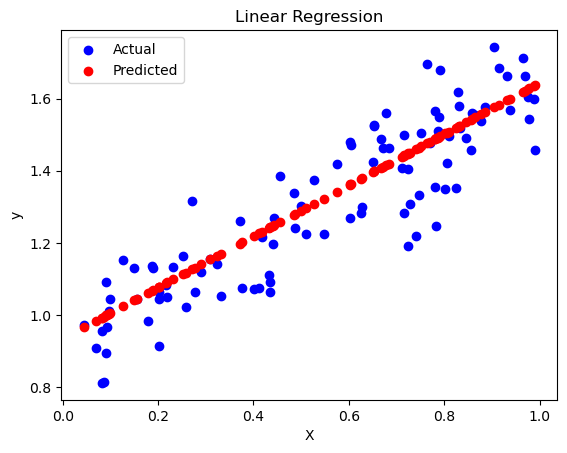

In [33]:
# Generate the data
X_train, y_train, X_val, y_val = LR_data()

# Create an instance of LinearRegression
model = LinearRegression(learning_rate=0.1, num_iterations=1000)

# Train the linear regression model
model.fit_analytic(X_train, y_train)

# Make predictions on the training and validation data
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate the score for training and validation data
r2_train = model.coeff_determination(y_train, y_train_pred)
r2_val = model.coeff_determination(y_val, y_val_pred)

print("Training Score:", r2_train)
print("Validation Score:", r2_val)

# Visualize the results
plt.scatter(X_val, y_val, color='b', label='Actual')
plt.scatter(X_val, y_val_pred, color='r', label='Predicted')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

Looking at the two implementations of linear regression, it is hard to determine which one is the best implementation. When refreshing the code, we arrive at different scores each time - sometimes great and sometimes not so great! Both code gets us to an output. 

Part 3: Experimenting

Moving on from part 1, we can use the code above to run some experiments. We can look at the effect of the number of features on training and validation scores. We can see below that as we increase the number of features, both the training and validation scores get extremely bad. This makes sense because as the number of features increases, we increase the possibility for overfitting, which would make the scores worse. 

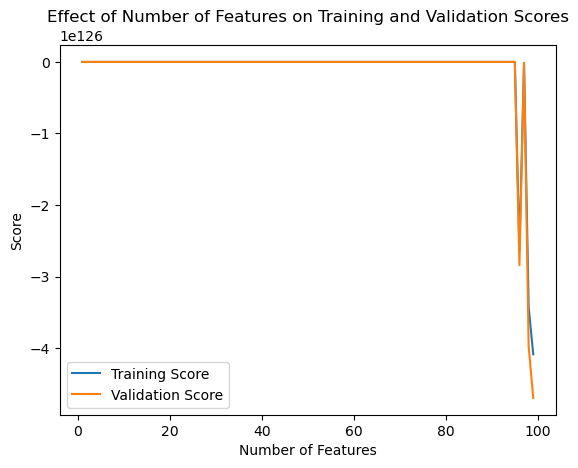

In [35]:
# Generate the data
n_train = 100
n_val = 100
noise = 0.1

# Define the range of features
p_features_range = range(1, n_train)

# Lists to store scores
train_scores = []
val_scores = []

# Iterate over the range of features
for p_features in p_features_range:
    # Generate data for current p_features
    X_train, y_train, X_val, y_val = LR_data(n_train=n_train, n_val=n_val, p_features=p_features, noise=noise)
    
    # Create an instance of LinearRegression
    model = LinearRegression(learning_rate=0.1, num_iterations=100)
    
    # Train the linear regression model
    model.fit_gradient(X_train, y_train)
    
    # Make predictions on the training and validation data
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate the score
    r2_train = model.coeff_determination(y_train, y_train_pred)
    r2_val = model.coeff_determination(y_val, y_val_pred)
    
    # Append scores to the lists
    train_scores.append(r2_train)
    val_scores.append(r2_val)

# Plot the training and validation scores
plt.plot(p_features_range, train_scores, label='Training Score')
plt.plot(p_features_range, val_scores, label='Validation Score')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Effect of Number of Features on Training and Validation Scores')
plt.legend()
plt.show()

Part 4: Lasso

In [38]:
#Lasso

from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.01)

p_features = n_train - 1
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)
L.fit(X_train, y_train)

L.score(X_val, y_val)

0.6672328921448816

Lasso is another algorithm that we can use. When we LASSO to train our data, we get a score of 66.7%. 

Let's take a closer look at the experimentation with LASSO. When we increase the number of features, we can see that for both LASSO and Linear Regression, the score gets worse. However, the score under LASSO gets significantly worse. This is because LASSO prevents overfitting, whereas, there is nothing preventing the Linear Regression models from overfitting. We can also see with LASSO that as we increase the alpha values, the scores get better. 

In [ ]:
#Experimenting

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Generate the data
n_train = 100
n_val = 100
noise = 0.1

# Define the range of features
p_features_range = range(1, n_train+20)

# Define the regularization strengths to test
alpha_values = [0.001, 0.01, 0.1]

# Lists to store scores
linear_reg_scores = []
lasso_scores = []

# Iterate over the range of features
for p_features in p_features_range:
    # Generate data for current p_features
    X_train, y_train, X_val, y_val = LR_data(n_train=n_train, n_val=n_val, p_features=p_features, noise=noise)
    
    # Linear Regression
    linear_reg_model = LinearRegression()
    linear_reg_model.fit_gradient(X_train, y_train)
    y_val_pred_linear_reg = linear_reg_model.predict(X_val)
    linear_reg_score = r2_score(y_val, y_val_pred_linear_reg)
    linear_reg_scores.append(linear_reg_score)
    
    # LASSO
    lasso_scores_for_alpha = []
    for alpha in alpha_values:
        lasso_model = Lasso(alpha=alpha)
        lasso_model.fit(X_train, y_train)
        y_val_pred_lasso = lasso_model.predict(X_val)
        lasso_score = r2_score(y_val, y_val_pred_lasso)
        lasso_scores_for_alpha.append(lasso_score)
    lasso_scores.append(lasso_scores_for_alpha)

# Plot the validation scores
plt.figure(figsize=(10, 6))

# Linear Regression
plt.plot(p_features_range, linear_reg_scores, label='Linear Regression')

# LASSO
for i, alpha in enumerate(alpha_values):
    lasso_scores_for_alpha = [scores[i] for scores in lasso_scores]
    plt.plot(p_features_range, lasso_scores_for_alpha, label=f'LASSO (alpha={alpha})')

plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('Validation Scores Comparison: Linear Regression vs LASSO')
plt.legend(loc='lower right')
plt.show()